<a href="https://colab.research.google.com/github/Marie00127/CV_Study_VISIONEERS/blob/main/CV_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5. 분류**

분류는 회귀와 함께 머신러닝에서 가장 기초적인 데이터 분석 방법 중 하나이다.

분류에서도 예측이 정답을 얼마나 맞혔는지에 대한 정확도를 측정하는데, 이때 정확도는 보통 퍼센트로 나타낸다.

# **5.1 이항분류**

이항 분류는 정답의 범주가 두 개인 분류 문제이다.

여기서는 와인 데이터세트를 이용하여 이항 분류를 해본다.

In [ ]:
#데이터 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

red wine인지 white wine인지 표시해주는 속성을 추가하고, 두 데이터를 합쳐준다.

데이터프레임에 새로운 속성을 추가하는 방법은 red['type'] = 0과 같이 파이썬의 사전 타입인 것처럼 속성명과 값을 지정해주는 것이다.

함수를 함치기 위해서는 pd.concat() 함수를 사용한다.

type의 평균이 0.75가 나온 것을 보면 1이 더 많다는 것을 짐작할 수 있다. 
맞는지는 아래 그래프로 확인할 수 있다.

pd.concat(a, b): 데이터 a, b 순서로 세로로 합쳐진다. => axis = 0 (default)

pd.concat(a, b, axis = 1): 데이터가 a, b 순서로 가로로 합쳐진다.

In [ ]:
#속성 추가, 데이터 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white]) #concat 이용하여 데이터 합치기
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

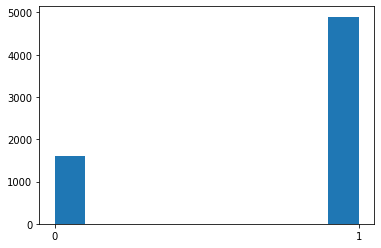

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
#red와 white 분포 그래프
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts()) #type에 존재하는 각 값의 수 출력

한 쪽의 데이터 양이 많거나 적으면  훈련 데이터와 테스트 데이터로 나누기 전에 비슷한 비율로 들어가도록 데이터를 섞어야 하지만, 1:3 정도의 비율은 랜덤하게 해도 거의 문제가 없다.

데이터를 섞기 전에 데이터 정규화를 거쳐야 한다.

외부에서 데이터를 불러오는 경우 어떤 값으로 구성되어 있는지 알기 힘들기에, 판다스의 info() 함수를 사용하여 데이터를 파악한다.

info()는 데이터프레임을 구성하는 속성들의 정보를 알려주는 함수이다. 
정규화 할 때 데이터에 숫자가 아닌 값이 들어가면 에러의 원인이 된다.

출력에 있는 fixed acidity 6497 non-null float64는 fixed acidity 속성이 6497개의 행에 null 값 없이 float64 데이터 유형으로 존재한다는 의미이다.

출력을 보면 모든 속성이 숫자 값이기 때문에 정규화를 진행할 수 있다.

In [ ]:
# 데이터 파악
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


pandas에서는 max(), min() 함수를 이용하여 각 속성의 최대 최소를 얻을 수 있다. 이 값들을 이용해 모든 속성과 행에 대한 계산이 가능하다.

다음은 정규화 코드이다.

describe()를 이용하여 모든 속성의 min이 0, max가 1인 것을 볼 수 있다.

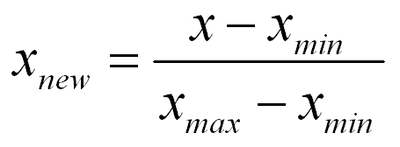

In [ ]:
# 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min()) 
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

정규화된 데이터를 랜덤하게 섞은 후 학습을 위하여 to_numpy() 함수를 사용하여 넘파이 array로 바꾼다.

sample() 함수는 전체 데이터프레임에서 frac 인수로 지정된 비율만큼의 행을 랜덤하게 뽑아 새로운 데이터프레임을 만든다.

frac은 0~1사이의 실수를 나타낸다. 단, 복원추출의 경우에는 frac > 1인 경우도 가능하다.

In [ ]:
#넘파이 array로 바꾸고, 새로운 데이터프레임 만들기

import numpy as np
wine_shuffle = wine_norm.sample(frac = 1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4049       0.247934          0.053333     0.216867        0.010736   0.041528   
1166       0.190083          0.246667     0.162651        0.003067   0.049834   
1275       0.198347          0.093333     0.162651        0.013804   0.091362   
4019       0.198347          0.160000     0.072289        0.064417   0.074751   
778        0.256198          0.093333     0.222892        0.220859   0.073090   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
4049             0.107639              0.211982  0.066898  0.232558   
1166             0.041667              0.175115  0.107769  0.395349   
1275             0.065972              0.290323  0.128976  0.387597   
4019             0.017361              0.209677  0.137459  0.341085   
778              0.201389              0.396313  0.233083  0.503876   

      sulphates   alcohol   quality  type  
4049   0.202247  0.478261  0.500000   1.0 

데이터를 훈련 데이터와 테스트 데이터로 나눌 차례이다. 검증 데이터는 케라스에서 자동으로 훈련 데이터 일부를 뽑아 만들 예정이므로 훈련 데이터와 테스트 데이터만 나누면 된다.

tf.keras.utils에서 불러오는 to_categorical은 분류 문제에서 자주 쓰인다. 정답 행렬을 원-핫-인코딩으로 바꿔준다. (원-핫-인코딩: 정답에 해당하는 인덱스의 값에는 1을 넣고, 나머지에는 0을 넣는 방식)

to_categorical의 두번째 인수인 num_classes는 정답 개수이다. (이 문제에서는 화이트 와인, 레드 와안)

to_categorical를 사용해서 정답의 인코딩 방식을 바꾼 결과, 0.0 -> [1. 0.] 1.0 -> [0. 1.]로 바뀐 것을 확인할 수 있다.

In [ ]:
#훈련 데이터와 테스트 데이터로 나누기
import tensorflow as tf

train_idx = int(len(wine_np) * 0.8) # 데이터의 80%를 훈련 데이터로 만들 예정이므로 wine_np의 수에 80%에 해당하는 인덱스를 저장한다. 
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 2)
print(train_Y[0])
print(test_Y[0])

[0.24793388 0.05333333 0.21686747 0.0107362  0.04152824 0.10763889
 0.21198157 0.06689801 0.23255814 0.20224719 0.47826087 0.5       ]
1.0
[0.56198347 0.18666667 0.34337349 0.02607362 0.12956811 0.01736111
 0.03225806 0.18604203 0.3255814  0.28089888 0.44927536 0.66666667]
0.0
[0. 1.]
[1. 0.]


딥러닝 학습을 해볼 차례이다.

모델 구조에 대한 특별한 이슈가 없기 때문에 앞에서 본 시퀀셜 모델을 사용한다.

밑에 모델은 분류 모델이기에 마지막 레이어의 활성화함수로 소프트맥스를 사용한다.


소프트맥스는 분류에서 가장 많이 쓰이는 함수로 출력값들을 자연로그의 밑인 e의 지수로 사용하여 계산한 뒤 모두 더한 값으로 나눈다. 식으로 나타내면 아래의 사진과 같다.

이 결괏값들의 총합은 1.0이다.

소프트맥스는 max 함수보다 약하지만 비슷하게 큰 값을 강조하고 작은 값은 약화하는 효과가 있다. e를 밑으로 하는 지수함 수를 취하기 때문에 가능하다. (0이나 음수에도 적용이 가능하다.)

소프트맥스는 분류 문제 뿐만이 아니라 결괏값으로 확률이 필요한 다양한 분야에서 쓰인다. 

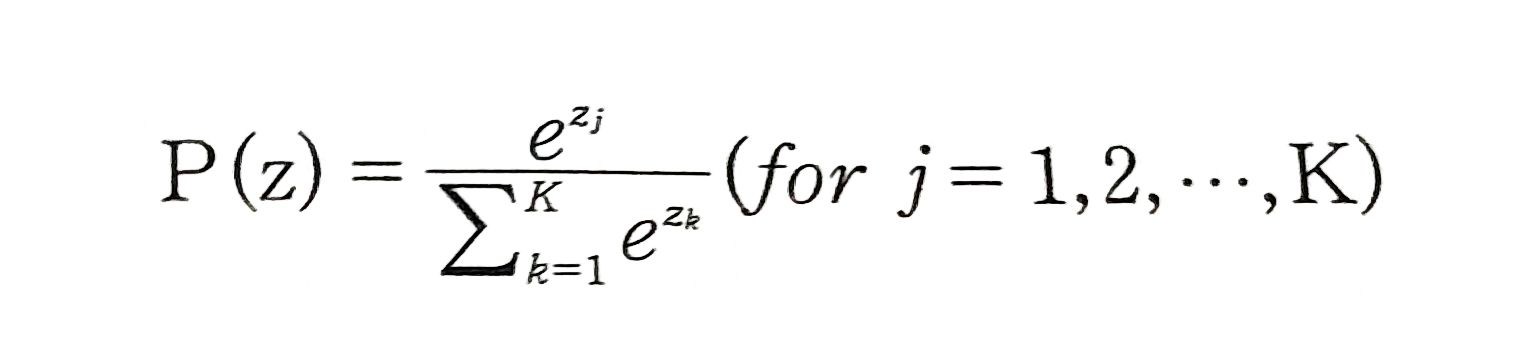

마지막 레이어에서 뉴런의 개수가 2로 설정되어 있다. 위에서 원-핫-인코딩으로 변환한 정답의 차원 수와 동일한 값이다. 

정답이 [1, 0]일 때, 예측이 [1, 0]이면 100%, [0, 1]이면 0%의 예측률을 보이는 것이 된다.

손실 함수 loss에 categorical_crossentropy가 사용된다.

categorical은 범주에 쓰이는 분류라는 의미이다. 크로스 엔트로피는 엔트로피의 기댓값과 비슷하지만 다른 점이 있다. 로그 뒤에 q(x)를 곱한다. q(x)란 분류 네트워크가 예측한 라벨의 확률값이다.

분류 문제에서 p(x)와 q(x)에 해당하는 범주의 종류는 2개 이상이다. 이에 대한 해결책은 모든 범주에 대한 평균을 내는 것이다. 

범주의 수를 n이라 할 때 크로엔트로피의 식은 다음과 같다.

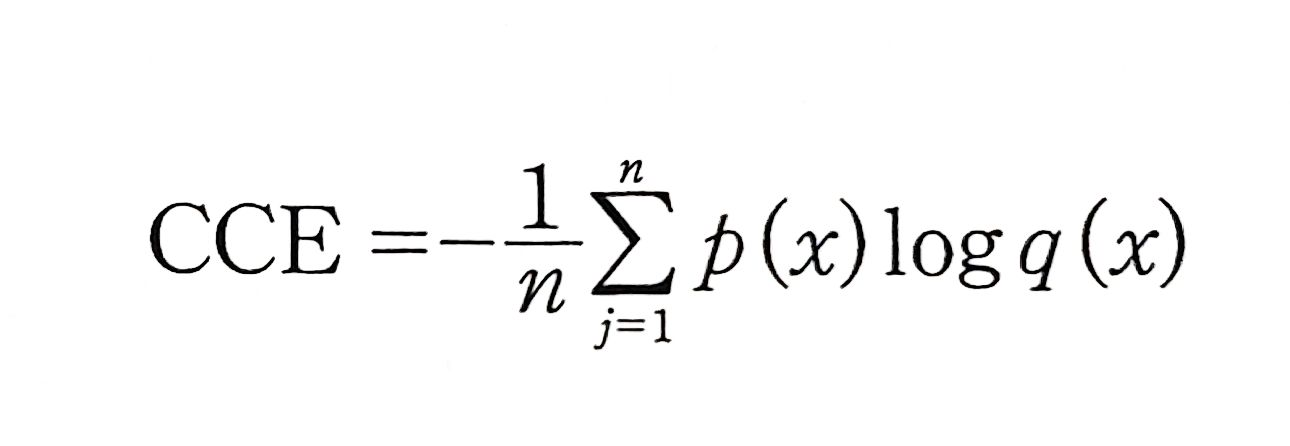

CCE도 손실의 일종이기에 낮을수록 좋은 값이고, 네트워크는 손실을 낮추기 위해 노력한다.

model.compile 함수의 metrics 인수에 정확도(accuracy)가 추가되었다. 분류 문제는 정확도로 퍼포먼스를 측정하기에 정확도를 설정하는 것은 필수이다.

In [ ]:
# 모델 생성
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12,)),
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                624       
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


분류 네트워크를 학습시킨다.

In [ ]:
#분류 네트워크 학습
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25) # 결과보면 100%에 가까운 정확도를 유지한다.

Epoch 1/25
122/122 [==============================] - 2s 7ms/step - loss: 0.1376 - accuracy: 0.9405 - val_loss: 0.0515 - val_accuracy: 0.9892
Epoch 2/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9779 - val_loss: 0.0667 - val_accuracy: 0.9754
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9864 - val_loss: 0.0478 - val_accuracy: 0.9892
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0475 - accuracy: 0.9885 - val_loss: 0.0407 - val_accuracy: 0.9877
Epoch 5/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9882 - val_loss: 0.0607 - val_accuracy: 0.9923
Epoch 6/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9854 - val_loss: 0.0371 - val_accuracy: 0.9908
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9867 - val_loss: 0.0352 - val_accuracy: 0.9915
Epoch 

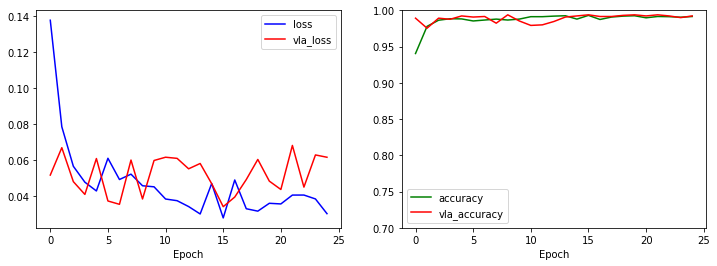

In [ ]:
#학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r-', label = 'vla_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

정확도가 99%로 오차가 거의 없이 분류하는 것을 확인할 수 있다.

In [ ]:
#테스트 데이터 사용하여 모델의 성능을 평가한다.
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9900


[0.03812471777200699, 0.9900000095367432]

# **5.2 다항 분류**

다항 분류란 범주의 수가 2개를 초과하는 경우이다.

이 절에서는 와인의 색깔 대신 품질을 예측한다.

먼저 품질 데이터가 어떤 비율로 구성되어 있는지 살펴본다.

In [ ]:
#품질 데이터가 어떤 비율로 구성되어 있는지 살펴보기
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


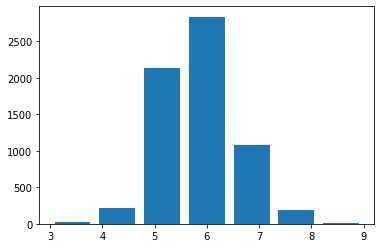

In [ ]:
#히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins = 7, rwidth = 0.8)
plt.show()

범주를 크게 세 가지로 재분류 한다.

품질 3-5는 나쁨, 7-9는 좋음, 6은 보통으로 분류한다.

데이터프레임에 쓰이는 loc은 특정한 데이터의 인덱스를 골라내는 역할을 한다.

대괄호 안에 인수 하나만 넣으면 행을 골라내고, 쉼표를 포함한 두 개의 인수를 넣으면 차례대로 행, 열을 골라낸다.

품질에 따라 해당하는 행을 선택한 뒤에, 'new_quality'라는 속성을 선택하고, 값을 추가하였다.

기존 데이터에 'new_quality'라는 속성이 없으면 새로 만들어진다.

각 항목을 구성하는 수가 너무 많거나 적으면 분류가 잘 안되기에 수를 비슷하게 맞춰주어야 한다.

In [ ]:
# 수가 일정하도록 나눠주기
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


5.1장에서 진행한 것과 같이 데이터 정규화 및 훈련 데이터와 테스트 데이터의 분리를 진행한다.

In [ ]:
del wine['quality'] # 새로운 속성 'new_quality'가 'quality'에서 나왔기에 삭제해준다.

# 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min()) 
wine_shuffle = wine_norm.sample(frac = 1)
wine_np = wine_shuffle.to_numpy()

#훈련 데이터와 테스트 데이터 나누기
train_idx = int(len(wine_np) * 0.8) # 데이터의 80%를 훈련 데이터로 만들 예정이므로 wine_np의 수에 80%에 해당하는 인덱스를 저장한다. 
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes = 3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes = 3)

학습을 진행한다.

In [ ]:
#다항 분류 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48, activation = 'relu', input_shape = (12,)),
                             tf.keras.layers.Dense(units = 24, activation = 'relu'),
                             tf.keras.layers.Dense(units = 12, activation = 'relu'),
                             tf.keras.layers.Dense(units = 3, activation = 'softmax') # units = 3
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07), loss = 'categorical_crossentropy', metrics = ['accuracy'])

#네트워크 학습
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)

#두 가지로 분류하는 것보다 성적이 잘 나오지는 않지만 검증 데이터에 대해 약 78%정도의 분류 성적을 거두고 있다.

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.4909 - accuracy: 0.7939 - val_loss: 0.4168 - val_accuracy: 0.8146
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8019 - val_loss: 0.3956 - val_accuracy: 0.8223
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8068 - val_loss: 0.4119 - val_accuracy: 0.8092
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8001 - val_loss: 0.3887 - val_accuracy: 0.8146
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8101 - val_loss: 0.4613 - val_accuracy: 0.7154
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8027 - val_loss: 0.4107 - val_accuracy: 0.7785
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8075 - val_loss: 0.3954 - val_accuracy: 0.8254
Epoch 

학습 결과를 시각화하면 이항 분류보다 정답을 찾기 어려운 문제인지 val_loss가 중간에 튀는 것을 볼 수 있다.

학습을 계속하면 loss는 꾸준히 작아지겠지만 과적합되어 val_loss는 증가하기 시작할 것이다.

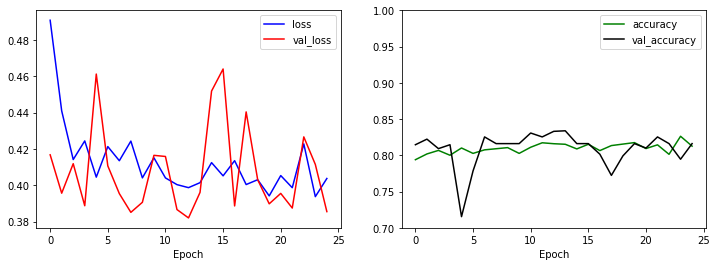

In [ ]:
#학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r-', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

learning_rate = 0.06일 때

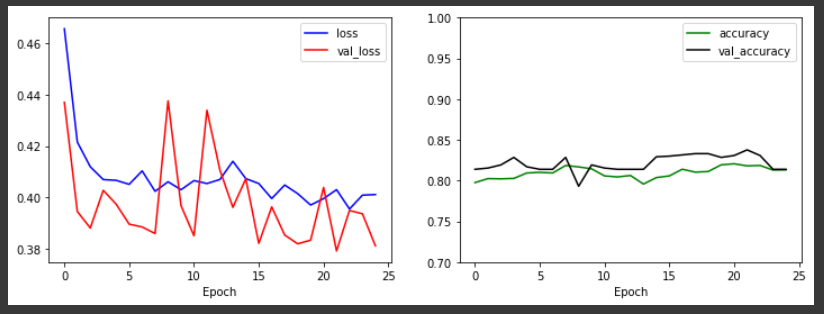

In [ ]:
#다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.7977


[0.4008879065513611, 0.7976922988891602]

# **5.3 Fashion MNIST**

유명한 데이터 중 하나인 Fashion MNIST 데이터세트로 다항분류를 실습해 보겠습니다.

MNIST는 손으로 쓴 숫자 글씨를 모아놓은 데이터세트이다. 

Fashion MNIST는 MNIST에 영향을 받아서 만들어진 데이터세트이다. 이 데이터세트는 손글씨가 아닌 옷과 신발, 가방의 이미지 등을 모아두었다.

Fashion MNIST 데이터세트는 tf.keras에 기본적으로 탑재되어 있기에 간단하게 불러올 수 있다.

In [ ]:
# 데이터세트 불러오기
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


imshow() 함수로 이미지를 그래프의 형태로 나타낼 수 있다.

colorbar() 함수는 그래프 옆에 색상의 값 정보를 바 형태로 표시한다. 

데이터의 이미지가 0-255까지의 값을 가지는 28x28픽셀 크기의 2차원 이미지라는 것을 알 수 있다.

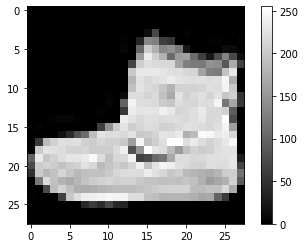

9


In [ ]:
# 데이터 세트가 어떻게 생겼는지 확인

import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap = 'gray')

plt.colorbar()
plt.show()

print(train_Y[0])

다음 코드에는 원-핫 인코딩으로 바꾸는 부분이 포함되지 않았다.

비효율적으로 필요한 숫자보다 더 많은 숫자를 사용하기에 원-핫 인코딩 과정은 넣지 않았다.

대신 이런 경우에 같은 정보를 압축적으로 표현하는 방법을 쓸 수 있다.

[0, 0, 0, 0, 0, 0, 0, 0, 1] => 9

[0, 0, 0, 1, 0, 0, 0, 0, 0] => 4

지금과 같은 경우에는 train_Y와 test_Y는 정보가 이미 위와 같이 표현되어 있기에 별도의 변환은 필요없다.

In [ ]:
# 데이터 정규화

train_X = train_X / 255.0
test_X = test_X / 255.0 
# 여기서는 최댓값, 최솟값을 모두 알고 있기에 255로 나누기만 하면 0.0 ~ 0.1 사이 값으로 정규화된다.

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

대신,모델 정의에서 원-핫 인코딩이 아닌 이러한 데이터를 받아서 계산하기 위해서 간단한 수정이 필요하다.

수정한 부분은 compile 함수의 loss에 들어가는 인수이다. 

sparse_categorical_crossentropy에서 Sparse는 희소 행렬을 의미한다.

이 함수를 사용하면 별도의 데이터 전처리 없이 희소 행렬을 나타내는 데이터를 정답 행렬로 사용할 수 있다.

원본이 28x28의 2차원 array이기 때문에 데이터를 일렬로 정렬하기 위해 Flatten이라는 레이어를 사용했다.

Flatten 레이어는 다차원 데이터를 1차원으로 정렬하는 역할을 한다.

마지막 레이어의 뉴런 수가 정답 범주와 같은 10개이다.

아래 코드에서는 Adam optimizer의 디폴트 값을 사용했다.

In [ ]:
#다항 분류 모델 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


학습 출력 결과를 봤을 때 훈련 데이터의 정확도는 점점 증가하고, 검증 데이터의 정확도는 일정한 수준으로 유지되는 것을 볼 수 있다.

In [ ]:
# 분류 모델 학습
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

Epoch 1/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.5335 - accuracy: 0.8132 - val_loss: 0.4196 - val_accuracy: 0.8516
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3990 - accuracy: 0.8577 - val_loss: 0.3811 - val_accuracy: 0.8642
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3547 - accuracy: 0.8727 - val_loss: 0.3570 - val_accuracy: 0.8728
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3268 - accuracy: 0.8802 - val_loss: 0.3545 - val_accuracy: 0.8726
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3071 - accuracy: 0.8864 - val_loss: 0.3337 - val_accuracy: 0.8779
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2938 - accuracy: 0.8917 - val_loss: 0.3437 - val_accuracy: 0.8733
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2778 - accuracy: 0.8972 - val_loss: 0.3828 - val_accuracy:

전체 학습 과정을 조망하기 위해 학습 결과를 시각화한다.

학습 결과를 시각화한 것을 보면 검증 데이터의 손실이 감소하다가 증가하는 모습을 보고 과적합 현상을 확인할 수 있다.

이를 막으려면 tf.keras.callbacks.EarlyStopping을 사용하면 된다.

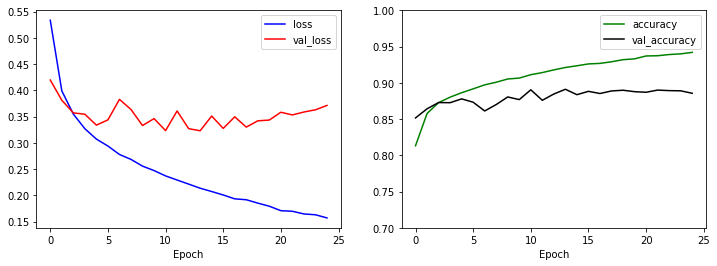

In [ ]:
# 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r-', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

테스트 데이터에 대한 정확도는 88.2%가 나왔다.

In [ ]:
# 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.4036 - accuracy: 0.8822


[0.40362748503685, 0.8822000026702881]